<a href="https://colab.research.google.com/github/KGzB/CAS-Applied-Data-Science/blob/master/Module-1/M1-D2-SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SQLite
This very short notebook shows how you can set up an SQLite data base from a .db-file and how to make querys to the data base.

In [ ]:
from google.colab import files

# Upload university.db file
uploaded = files.upload()

Saving university.db to university.db


In [ ]:
import sqlite3
import pandas as pd

# Connect to data base
connection = sqlite3.connect('university.db')

In [ ]:
# Query to get all tables
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute Query
tables_df = pd.read_sql(query, connection)

# Display result
print("Tables in the database:")
print(tables_df)


Tables in the database:
          name
0    classroom
1   department
2       course
3   instructor
4      section
5      teaches
6      student
7        takes
8      advisor
9    time_slot
10      prereq


Now check that you can read the tables:

In [ ]:
# get all departments
query = "SELECT * FROM department"
pd.read_sql(query,connection)


,dept_name,building,budget
0,Biology,Watson,90000
1,Comp. Sci.,Taylor,100000
2,Elec. Eng.,Taylor,85000
3,Finance,Painter,120000
4,History,Painter,50000
5,Music,Packard,80000
6,Physics,Watson,70000


Now continue with your task!

In [ ]:
# get all all instructors and their departments
query = "SELECT * FROM instructor NATUAL JOIN department"
pd.read_sql(query,connection)


,ID,name,dept_name,salary,dept_name,building,budget
0,10101,Srinivasan,Comp. Sci.,65000,Biology,Watson,90000
1,10101,Srinivasan,Comp. Sci.,65000,Comp. Sci.,Taylor,100000
2,10101,Srinivasan,Comp. Sci.,65000,Elec. Eng.,Taylor,85000
3,10101,Srinivasan,Comp. Sci.,65000,Finance,Painter,120000
4,10101,Srinivasan,Comp. Sci.,65000,History,Painter,50000
...,...,...,...,...,...,...,...
79,98345,Kim,Elec. Eng.,80000,Elec. Eng.,Taylor,85000
80,98345,Kim,Elec. Eng.,80000,Finance,Painter,120000
81,98345,Kim,Elec. Eng.,80000,History,Painter,50000
82,98345,Kim,Elec. Eng.,80000,Music,Packard,80000


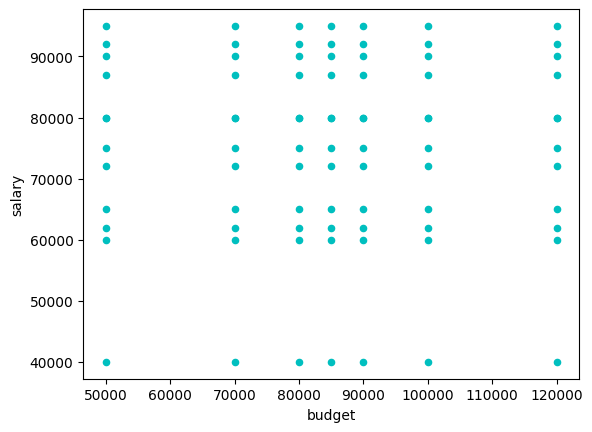

In [ ]:
# Plot salary vs. department budget.
import matplotlib.pyplot as plt

query = "SELECT * FROM instructor NATUAL JOIN department"
df = pd.read_sql(query,connection)
df.plot(x='budget',y='salary',kind="scatter",c='c')
plt.show()

In [ ]:
#close connection
connection.close()